In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/raw/AMZN_stock_data.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
5,1997-05-22 00:00:00-04:00,0.071875,0.072396,0.065625,0.069792,235536000,0.0,0.0
6,1997-05-23 00:00:00-04:00,0.070313,0.076042,0.066667,0.075000,318744000,0.0,0.0
7,1997-05-27 00:00:00-04:00,0.075521,0.082292,0.072917,0.079167,173952000,0.0,0.0
8,1997-05-28 00:00:00-04:00,0.081250,0.081771,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29 00:00:00-04:00,0.077083,0.077083,0.073958,0.075260,69456000,0.0,0.0


In [4]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'], utc=True) # utc=True to avoid timezone issues

In [7]:
df['Days'] = (df['Date'] - df['Date'].min()).dt.days # days since the first date
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Days
0,1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,0
1,1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,1
2,1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,4
3,1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,5
4,1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,6


In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Days
count,6987.000000,6987.000000,6987.000000,6987.000000,6.987000e+03,6987.0,6987.000000,6987.000000
mean,40.692696,41.165619,40.178290,40.685061,1.360552e+08,0.0,0.003864,5070.732217
std,58.144182,58.787641,57.435304,58.125169,1.375735e+08,0.0,0.244286,2927.737922
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06,0.0,0.000000,0.000000
25%,2.100250,2.148250,2.064250,2.110000,6.298900e+07,0.0,0.000000,2538.500000
50%,9.041500,9.158500,8.925000,9.021000,1.005360e+08,0.0,0.000000,5069.000000
75%,72.789249,73.643497,71.504250,73.006500,1.555070e+08,0.0,0.000000,7606.500000
max,239.020004,242.520004,238.029999,242.059998,2.086584e+09,0.0,20.000000,10144.000000


In [9]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Days            0
dtype: int64

In [12]:
print(df.duplicated().sum())

0


# Closing Price over time

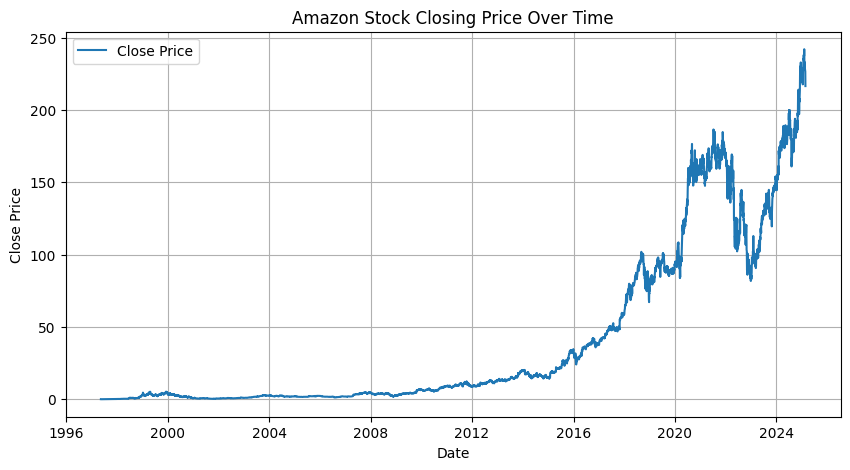

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Stock Volume Over Time

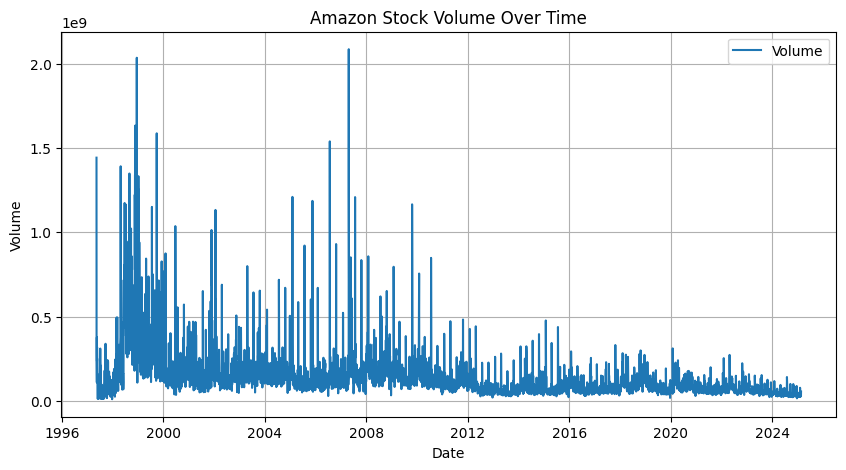

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Volume'],label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Amazon Stock Volume Over Time')
plt.legend()    
plt.grid(True)
plt.show()

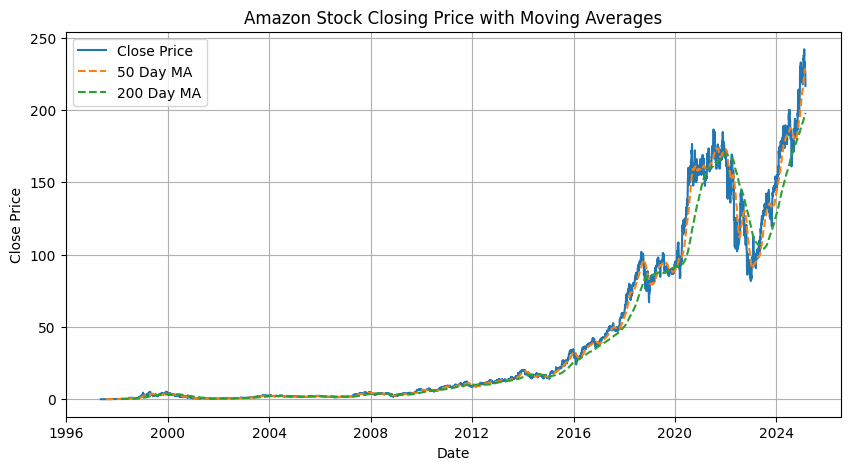

In [15]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['50_MA'], label='50 Day MA',linestyle='--')
plt.plot(df['Date'], df['200_MA'], label='200 Day MA',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()